In [1]:
#导入需要的库
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
%matplotlib inline

In [2]:
#读取数据
aural = np.load(r'data/mod_aural.npy')
social = np.load(r'data/mod_social.npy')
textual = np.load(r'data/mod_textual.npy')
visual = np.load(r'data/mod_visual.npy')
train = np.load(r'data/train.npy')
#训练数据
aural_train = aural[:1600,:]
social_train = social[:1600,:]
textual_train = textual[:1600,:]
visual_train = visual[:1600,:]
#测试数据
aural_test = aural[1600:,:]
social_test = social[1600:,:]
textual_test = textual[1600:,:]
visual_test = visual[1600:,:]

# 尝试做一元线性回归
Y = WX + B

In [3]:
#连接数据
linear_train = np.concatenate([aural_train, social_train,textual_train,visual_train], 1)
linear_test = np.concatenate([aural_test,social_test,textual_test,visual_test],1)

m = linear_train.shape[0]
n0 = linear_train.shape[1]
nL = int(train.size/m)
print('m：',m,'n0：',n0,'nL:',nL)

m： 1600 n0： 279 nL: 1


In [4]:
class LRnet(nn.Module):
    """
    Linear Regressoin Module, the input features and output 
    features are defaults both 1
    """
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(n0,nL)
        self.predict = nn.Linear(nL,nL) 
    
    def forward(self,x):
        x = nn.functional.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [5]:
reg = LRnet()
print(reg)
optimizer = torch.optim.SGD(reg.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
plt.ion() 

LRnet(
  (hidden): Linear(in_features=279, out_features=1, bias=True)
  (predict): Linear(in_features=1, out_features=1, bias=True)
)


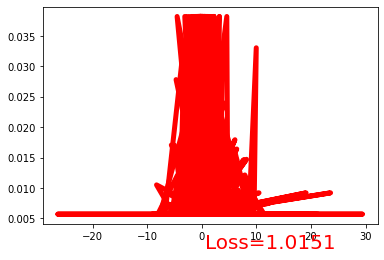

In [6]:
data = {'x':torch.from_numpy(linear_train),'y':torch.from_numpy(train)}
for t in range(200):
    prediction = reg(data['x'])
    loss = loss_func(prediction, data['y'])     # must be (1. nn output, 2. target)
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.plot(data['x'].data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.ioff()
plt.show()

In [13]:
predict = reg(torch.from_numpy(linear_test))
pre = predict.detach().numpy()
np.save('prediction.npy',pre)